# 演習問題4.2 (1)

In [5]:
!pip install japanize-matplotlib
import japanize_matplotlib

最終的な誤り係数ベクトル α = [3. 2. 1. 1. 4. 1.]


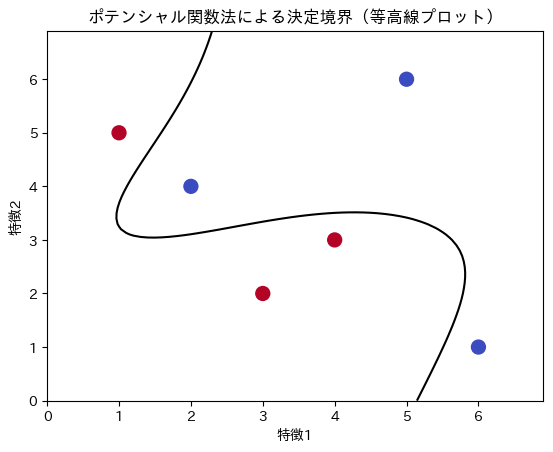

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 学習パターンと教師信号
X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])
b = np.array([1, 1, 1, -1, -1, -1])

# ガウス関数のパラメータ
sigma = 2.0

# 初期誤り係数ベクトル
alpha = np.zeros(len(X))

# 識別関数
def g(x, alpha, b):
    result = 0
    for i in range(len(X)):
        result += alpha[i] * b[i] * np.exp(-np.linalg.norm(x - X[i]) ** 2 / (2 * sigma ** 2))
    return result

# 学習アルゴリズム
epochs = 100  # 学習のエポック数
for epoch in range(epochs):
    for k in range(len(X)):
        x_k = X[k]
        y_k = g(x_k, alpha, b)
        if b[k] * y_k <= 0:
            alpha[k] += 1

# 最終的な誤り係数ベクトル
print("最終的な誤り係数ベクトル α =", alpha)

# 決定境界を図示（等高線プロット）
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([g([x, y], alpha, b) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='black')
plt.xlabel('特徴1')
plt.ylabel('特徴2')
plt.title('ポテンシャル関数法による決定境界（等高線プロット）')

# 学習データを散布図としてプロット
plt.scatter(X[:, 0], X[:, 1], c=b, cmap=plt.cm.coolwarm, s=100)

plt.show()


## 解説

1. 学習パターンと教師信号を設定します.
```python
X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])
b = np.array([1, 1, 1, -1, -1, -1])
```
2. ガウス関数のパラメータ $sigma$ と初期誤り係数ベクトル $alpha$ を設定します.
```python
sigma = 2.0
alpha = np.zeros(len(X))
```
3. 識別関数 $g$ を定義します.この関数は, ポテンシャル関数法に基づいて識別を行います.
```python
def g(x, alpha, b):
    result = 0
    for i in range(len(X)):
        result += alpha[i] * b[i] * np.exp(-np.linalg.norm(x - X[i]) ** 2 / (2 * sigma ** 2))
    return result
```
$g$ 関数は学習パターン $x$ に対して識別を行います. 各学習パターンに対して, 他の学習パターンとの類似度をガウスカーネルを用いて計算し, 重み $alpha$ と教師信号 $b$ を使用して識別スコアを計算します.

4. 学習アルゴリズムを実行します. 指定したエポック数だけ学習を繰り返し, 誤りがある場合に誤り係数ベクトル $alpha$ を更新します.
```python
epochs = 100  # 学習のエポック数
for epoch in range(epochs):
    for k in range(len(X)):
        x_k = X[k]
        y_k = g(x_k, alpha, b)
        if b[k] * y_k <= 0:
            alpha[k] += 1
```
学習は複数のエポックで行われ, 各エポック内で学習パターンごとに誤りを検出し, 誤りがある場合に誤り係数 $alpha$ を更新します.

5. 最終的な誤り係数ベクトル $alpha$ を表示します.
```python
print("最終的な誤り係数ベクトル α =", alpha)
```
6. 決定境界を図示します. メッシュグリッド上で識別関数 $g$ を計算し, 等高線プロットを使用して決定境界を可視化します. また, 学習データを散布図としてプロットします.
```python
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([g([x, y], alpha, b) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='black')
plt.xlabel('特徴1')
plt.ylabel('特徴2')
plt.title('ポテンシャル関数法による決定境界（等高線プロット）')
plt.scatter(X[:, 0], X[:, 1], c=b, cmap=plt.cm.coolwarm, s=100)
plt.show()
```
$xx$ と $yy$ はメッシュグリッドを作成し, $Z$ に各メッシュグリッド上の識別関数 $g$ の値を計算します。
```python
plt.contour(xx, yy, Z, levels=[0], colors='black')
```
 で決定境界を等高線プロットします.
 ```python
plt.scatter(X[:, 0], X[:, 1], c=b, cmap=plt.cm.coolwarm, s=100)
```
 で学習データを散布図としてプロットします.
このコードは, 学習パターンのクラスをポテンシャル関数法を使用して識別し, 決定境界を等高線プロットで可視化し, 学習データを散布図として表示します.

# 演習問題4.2 (2)

最終的な誤り係数ベクトル α = [17. 28. 33. 10. 15.  8.]


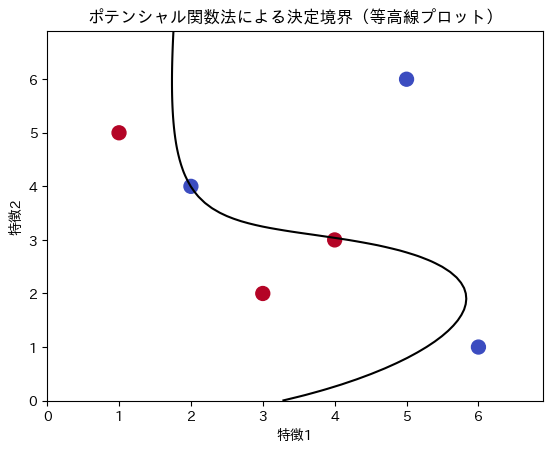

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 学習パターンと教師信号
X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])
b = np.array([1, 1, 1, -1, -1, -1])

# ポテンシャル関数の定義
def K(x, x_k):
    return (1 + np.dot(x, x_k))**3

# 初期誤り係数ベクトル
alpha = np.zeros(len(X))

# 識別関数
def g(x, alpha, b):
    result = 0
    for i in range(len(X)):
        result += alpha[i] * b[i] * K(x, X[i])
    return result

# 学習アルゴリズム
epochs = 100  # 学習のエポック数
for epoch in range(epochs):
    for k in range(len(X)):
        x_k = X[k]
        y_k = g(x_k, alpha, b)
        if b[k] * y_k <= 0:
            alpha[k] += 1

# 最終的な誤り係数ベクトル
print("最終的な誤り係数ベクトル α =", alpha)

# 決定境界を図示（等高線プロット）
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([g([x, y], alpha, b) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='black')
plt.xlabel('特徴1')
plt.ylabel('特徴2')
plt.title('ポテンシャル関数法による決定境界（等高線プロット）')

# 学習データを散布図としてプロット
plt.scatter(X[:, 0], X[:, 1], c=b, cmap=plt.cm.coolwarm, s=100)

plt.show()


## 解説

1. 学習パターンと教師信号の定義
```python
X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])
b = np.array([1, 1, 1, -1, -1, -1])
```
$x$ は学習データの特徴ベクトルを保持する行列です. 各行が1つのデータ点で, 各列が特徴量を表します.
$b$ は対応する学習データのクラスラベルを示す教師信号です. 正の値はクラス $ω_1$ を示し, 負の値はクラス $ω_2$ を示します.

2. ポテンシャル関数の定義
```python
def K(x, x_k):
    return (1 + np.dot(x, x_k))**3
```
$K(x, x_k)$  関数はポテンシャル関数です. $2$ つの特徴ベクトル $x$ と $x_k$ の内積に $1$ を加え、その結果を $3$ 乗しています. これは学習アルゴリズムでデータの類似性を評価するのに使用されます.

3. 誤り係数ベクトルの初期値を設定
```python
alpha = np.zeros(len(X))
```
$alpha$ ベクトルは, 各学習データ点に関連付けられた誤り係数を保持します. 初期値として $0$ が設定されます.

4. 識別関数を定義
```python
def g(x, alpha, b):
    result = 0
    for i in range(len(X)):
        result += alpha[i] * b[i] * K(x, X[i])
    return result
```
$g(x, alpha, b)$ 関数は識別関数です. 与えられた特徴ベクトル $x$ に対して, 各学習データ点のポテンシャル関数値を計算し, 誤り係数 $alpha$ とクラスラベル $b$ で重み付けして合計します.

5. 学習アルゴリズム
```python
epochs = 100  # 学習のエポック数
for epoch in range(epochs):
    for k in range(len(X)):
        x_k = X[k]
        y_k = g(x_k, alpha, b)
        if b[k] * y_k <= 0:
            alpha[k] += 1
```
学習アルゴリズムは指定されたエポック数（ここでは $100$ 回）繰り返します. 各エポックで, 各学習データ点に対して識別関数を使用して識別結果 $y_k$ を計算し, 誤りがある場合, 対応する誤り係数 $alpha$ を増やして誤りを修正します.

6. 最終的な誤り係数ベクトルの表示
```python
print("最終的な誤り係数ベクトル α =", alpha)
```
最終的な誤り係数ベクトル $alpha$ を表示します.

7. 決定境界の図示
```python
x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([g([x, y], alpha, b) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors='black')
plt.xlabel('特徴1')
plt.ylabel('特徴2')
plt.title('ポテンシャル関数法による決定境界（等高線プロット）')
```
最後に, 学習アルゴリズムによって得られた誤り係数 $alpha$ を用いて、決定境界を図示します. 決定境界は等高線プロットを使用して表示され, クラス $ω_1$ と $ω_2$ の学習データも散布図としてプロットされます.